In [3]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [4]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [5]:
from uk_covid19 import Cov19API

In [6]:
England_structure = [
    'areaType=nation',
    'areaName=England']

In [7]:
cases_and_deaths = {
    "date":"date",
    "areaName": "areaName",
    "areaCode": "areaCode",
    "hospitalCasese": "hospitalCases",
    "covidOccupiedMVBeds": "covidOccupiedMVBeds",
    "cumAdmissions": "cumAdmissions",
    "cumDailyNsoDeathsByDeathDate": "cumDailyNsoDeathsByDeathDate"
}

In [8]:
api = Cov19API(filters=England_structure, structure=cases_and_deaths)

In [9]:
deathnumber=api.get_json()

In [10]:
print("Introduction: According to the data- date,areaName,areaCode,hospital Case,covid OccupiedMV Beds,cumAdmissions, cumDailyNsoDeathsByDeathDate to compare the number of hospitalizations with the number of ventilators, the number of confirmed cases and the number of deaths.")

Introduction: According to the data- date,areaName,areaCode,hospital Case,covid OccupiedMV Beds,cumAdmissions, cumDailyNsoDeathsByDeathDate to compare the number of hospitalizations with the number of ventilators, the number of confirmed cases and the number of deaths.


In [11]:
print("The type of number:")
print(type(deathnumber))

The type of number:
<class 'dict'>


In [12]:
import json

In [13]:
with open("deathnumber.json", "wt") as OUTF:
    json.dump(deathnumber, OUTF)

In [14]:
with open("deathnumber.json", "rt") as INFILE:
    data=json.load(INFILE)

In [15]:
datalist=data['data']


In [16]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()


In [17]:
def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [18]:
    startdate=parse_date(dates[0])
    enddate=parse_date(dates[-1])
    print ("A partial record of API's condition time from：",startdate, ' to ', enddate)

A partial record of API's condition time from： 2020-01-30 00:00:00  to  2022-11-30 00:00:00


In [19]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['areaName', 'areaCode','hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate'])

In [20]:
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['areaName', 'areaCode','hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate']:
        if pd.isna(timeseriesdf.loc[date, column]): 
            value= entry[column] if entry[column]!=None else 0
            timeseriesdf.loc[date, column]=value

timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf

,areaName,areaCode,hospitalCasese,covidOccupiedMVBeds,cumAdmissions,cumDailyNsoDeathsByDeathDate
2020-01-30,England,E92000001,0,0,0,1
2020-01-31,England,E92000001,0,0,0,1
2020-02-01,England,E92000001,0,0,0,1
2020-02-02,England,E92000001,0,0,0,2
2020-02-03,England,E92000001,0,0,0,2
...,...,...,...,...,...,...
2022-11-26,England,E92000001,4568,125,908330,0
2022-11-27,England,E92000001,4639,128,908887,0
2022-11-28,England,E92000001,4775,111,909526,0
2022-11-29,England,E92000001,4847,117,0,0


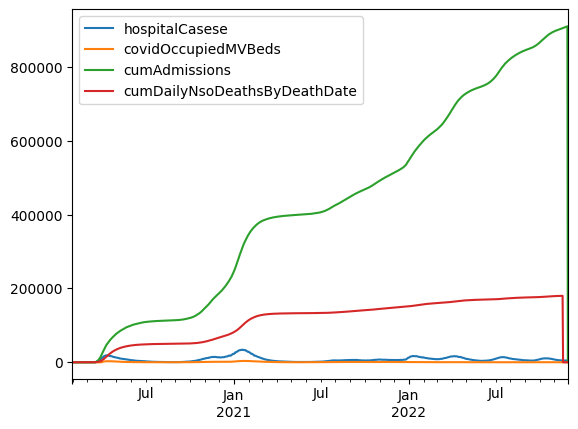

In [21]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf2=pd.DataFrame(index=index, columns=['areaName', 'areaCode','hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate'])
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['areaName', 'areaCode','hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate']:
        if pd.isna(timeseriesdf2.loc[date, column]): 
            value= entry[column] if entry[column]!=None else 0
            timeseriesdf2.loc[date, column]=value

timeseriesdf2.fillna(0.0, inplace=True)
timeseriesdf2.plot();

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

<AxesSubplot:ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

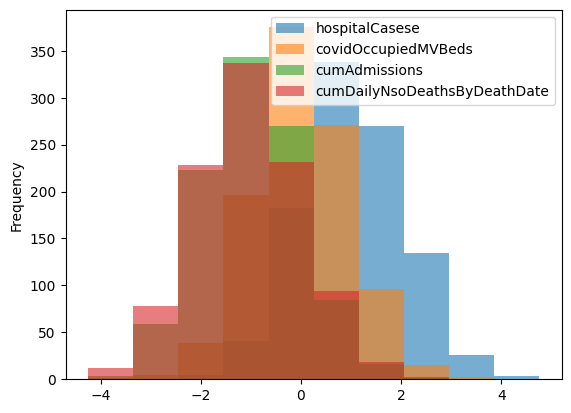

<Figure size 640x480 with 0 Axes>

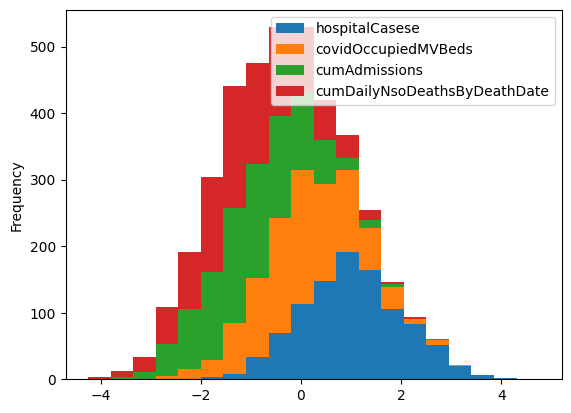

In [22]:
In [24]: df4 = pd.DataFrame(
   ....:     {
   ....:         "hospitalCasese": np.random.randn(1000) + 1,
   ....:         "covidOccupiedMVBeds": np.random.randn(1000),
   ....:         "cumAdmissions": np.random.randn(1000) - 1,
                 "cumDailyNsoDeathsByDeathDate": np.random.randn(1000) - 1
   ....:     },
   ....:     columns=['hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate'],
   ....: )
   ....: 

In [25]: plt.figure();

In [26]: df4.plot.hist(alpha=0.6);
plt.figure();
def access_api(button):
    apibutton.icon="check"
    apibutton.disabled=True

apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', 
    tooltip='Click to download current Public Health England data',
    icon='download' )

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)
df4.plot.hist(stacked=True, bins=20)

In [23]:
with open("deathnumber.json", "rt") as INFILE:
    data=json.load(INFILE)

In [24]:
datadic=data['data'][6] # data['data'] is a list
print("Example: Selected data types include:")
datadic

Example: Selected data types include:


{'date': '2022-11-24',
 'areaName': 'England',
 'areaCode': 'E92000001',
 'hospitalCasese': 4701,
 'covidOccupiedMVBeds': 122,
 'cumAdmissions': 907449,
 'cumDailyNsoDeathsByDeathDate': None}

In [25]:
timeseriesdf.to_pickle("timeseriesdf.pkl")

In [26]:
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [27]:
import ipywidgets as widgets

In [28]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf2=pd.DataFrame(index=index, columns=['areaName', 'areaCode','hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate'])
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['areaName', 'areaCode','hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate']:
        if pd.isna(timeseriesdf2.loc[date, column]): 
            value= entry[column] if entry[column]!=None else 0
            timeseriesdf2.loc[date, column]=value

timeseriesdf2.fillna(0.0, inplace=True)
        

series=wdg.SelectMultiple(
    options=['hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate'],
    value=['hospitalCasese','covidOccupiedMVBeds','cumAdmissions','cumDailyNsoDeathsByDeathDate'],
    rows=4,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show() # important - graphs won't update if this is missing 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

def access_api(button):
    apibutton.icon="check"
    apibutton.disabled=True

apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', 
    tooltip='Click to download current Public Health England data',
    icon='download' )

# register the callback function with the button
apibutton.on_click(access_api)

# this is an iPython function that generalises print for Jupyter Notebooks; we use it to 
# display the widgets
display(apibutton)

Output()

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

In [29]:
jsondata={}

In [30]:

def access_api():
    """ Accesses the PHE API. Returns raw data in the same format as data loaded from the "canned" JSON file. """
    return {} # return data read from the API

In [31]:

def api_button_callback(button):
    """ Button callback - it must take the button as its parameter (unused in this case).
    Accesses API, wrangles data, updates global variable df used for plotting. """
    # Get fresh data from the API. If you have time, include some error handling
    # around this call.
    apidata=access_api()
    # wrangle the data and overwrite the dataframe for plotting
    global df
    df=wrangle_data(apidata)

    refresh_graph()
 
    apibutton.icon="check"
    # apibutton.disabled=True

    
apibutton=wdg.Button(
    description='PANIC', # you may want to change this...
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip="Keep calm and carry on",
    # FontAwesome names without the `fa-` prefix - try "download"
    icon='exclamation-triangle'
)

# remember to register your button callback function with the button
apibutton.on_click(api_button_callback) # the name of your function inside these brackets

display(apibutton)

# run all cells before clicking on this button

Button(button_style='danger', description='PANIC', icon='exclamation-triangle', style=ButtonStyle(), tooltip='…